In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string


# VERİNİN OKUNMASI

In [3]:
df = pd.read_csv(r'./dataset/SMSSpamCollection.csv')
df

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,spam
5570,Will Ã¼ b going to esplanade fr home?,ham
5571,"Pity, * was in mood for that. So...any other s...",ham
5572,The guy did some bitching but I acted like i'd...,ham


# VERİ SETİNDEKİ MESAJLARIN İŞLENMESİ

In [4]:
def remove_special_chars(word):
    special_chars = '!()-_?*.:\'\",;<>'
    for char in special_chars:
        word = word.replace(char, '')
    return word.lower()

In [5]:
def get_words_from_messages():
    messages = df['message']
    unique_words = []
    for msg in messages:
        words = msg.split(" ")
        for wrd in words:
            wrd = remove_special_chars(wrd)
            if len(wrd) < 2 or not wrd.isalpha():
                continue
            unique_words.append(wrd)
    return unique_words

In [6]:
words = get_words_from_messages()
words

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'great',
 'world',
 'la',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'free',
 'entry',
 'in',
 'wkly',
 'comp',
 'to',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 'may',
 'text',
 'fa',
 'to',
 'to',
 'receive',
 'entry',
 'questionstd',
 'txt',
 'apply',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 'already',
 'then',
 'say',
 'nah',
 'dont',
 'think',
 'he',
 'goes',
 'to',
 'usf',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'freemsg',
 'hey',
 'there',
 'darling',
 'its',
 'been',
 'weeks',
 'now',
 'and',
 'no',
 'word',
 'back',
 'id',
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'to',
 'send',
 'to',
 'rcv',
 'even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 'they',
 'treat',
 'me',
 'like',
 'aids',
 'patent',
 'as',
 'per',
 'your',
 'reque

In [7]:
occurences = Counter(words)
dict(occurences)

{'go': 281,
 'until': 27,
 'jurong': 1,
 'point': 13,
 'crazy': 15,
 'available': 16,
 'only': 211,
 'in': 887,
 'bugis': 7,
 'great': 111,
 'world': 33,
 'la': 7,
 'buffet': 2,
 'cine': 7,
 'there': 196,
 'got': 239,
 'amore': 1,
 'wat': 96,
 'ok': 278,
 'lar': 38,
 'joking': 6,
 'wif': 27,
 'oni': 4,
 'free': 275,
 'entry': 26,
 'wkly': 14,
 'comp': 11,
 'to': 2251,
 'win': 72,
 'fa': 4,
 'cup': 9,
 'final': 18,
 'tkts': 4,
 'may': 48,
 'text': 188,
 'receive': 38,
 'questionstd': 2,
 'txt': 163,
 'apply': 31,
 'dun': 55,
 'say': 92,
 'so': 439,
 'early': 33,
 'hor': 2,
 'already': 90,
 'then': 233,
 'nah': 10,
 'dont': 285,
 'think': 132,
 'he': 184,
 'goes': 26,
 'usf': 11,
 'lives': 4,
 'around': 61,
 'here': 117,
 'though': 26,
 'freemsg': 12,
 'hey': 111,
 'darling': 5,
 'its': 309,
 'been': 131,
 'weeks': 19,
 'now': 478,
 'and': 971,
 'no': 334,
 'word': 34,
 'back': 152,
 'id': 32,
 'like': 244,
 'some': 118,
 'fun': 31,
 'you': 2128,
 'up': 305,
 'for': 710,
 'it': 621,
 'st

In [8]:
value_counts = Counter(occurences.values())
dict(value_counts)

{281: 1,
 27: 18,
 1: 4377,
 13: 49,
 15: 35,
 16: 30,
 211: 1,
 887: 1,
 7: 138,
 111: 2,
 33: 13,
 2: 1197,
 196: 1,
 239: 2,
 96: 2,
 278: 2,
 38: 12,
 6: 171,
 4: 332,
 275: 1,
 26: 17,
 14: 39,
 11: 53,
 2251: 1,
 72: 2,
 9: 88,
 18: 22,
 48: 3,
 188: 1,
 163: 1,
 31: 19,
 55: 5,
 92: 3,
 439: 1,
 90: 2,
 233: 1,
 10: 84,
 285: 1,
 132: 1,
 184: 1,
 61: 4,
 117: 2,
 12: 53,
 5: 217,
 309: 1,
 131: 3,
 19: 22,
 478: 1,
 971: 1,
 334: 1,
 34: 9,
 152: 2,
 32: 12,
 244: 1,
 118: 1,
 2128: 1,
 305: 1,
 710: 1,
 621: 1,
 154: 1,
 191: 1,
 63: 2,
 757: 1,
 893: 1,
 436: 1,
 382: 1,
 791: 1,
 125: 3,
 180: 1,
 58: 4,
 677: 1,
 8: 103,
 3: 563,
 20: 23,
 269: 1,
 29: 14,
 576: 1,
 113: 4,
 578: 1,
 30: 11,
 23: 16,
 21: 23,
 103: 1,
 138: 1,
 417: 1,
 109: 2,
 24: 17,
 1333: 1,
 39: 10,
 36: 7,
 536: 1,
 464: 1,
 385: 2,
 162: 1,
 59: 5,
 193: 1,
 45: 8,
 166: 2,
 330: 1,
 43: 8,
 60: 5,
 74: 3,
 141: 1,
 144: 1,
 65: 4,
 73: 3,
 112: 1,
 148: 1,
 22: 20,
 28: 10,
 56: 6,
 126: 1,
 383: 2

# KELİMELERİN DAĞILIMI

Text(0.5, 0.98, 'Words distribution')

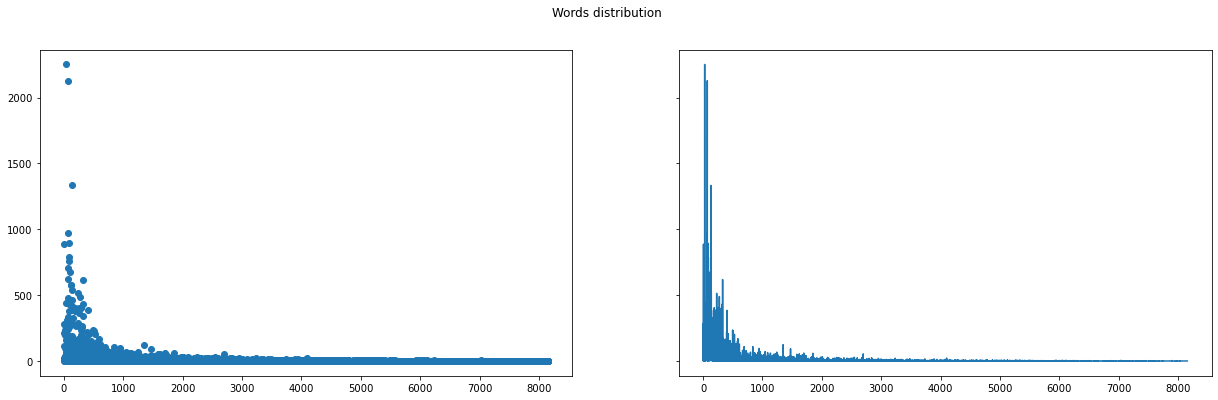

In [9]:
names = list(range(0, len(occurences.keys())))
values = list(occurences.values())

fig, axs = plt.subplots(1, 2, figsize=(21,6), sharey=True)
axs[0].scatter(names, values)
axs[1].plot(names, values)
fig.suptitle('Words distribution')

## En fazla tekrar eden kelimeler

In [10]:
sorted_occ = dict(sorted(occurences.items(), key=lambda item: item[1],reverse=True))
print('1:', list(sorted_occ)[0])
print('2:', list(sorted_occ)[1])
print('3:', list(sorted_occ)[2])

1: to
2: you
3: the


## Kelime Adetlerinin Dağılımı

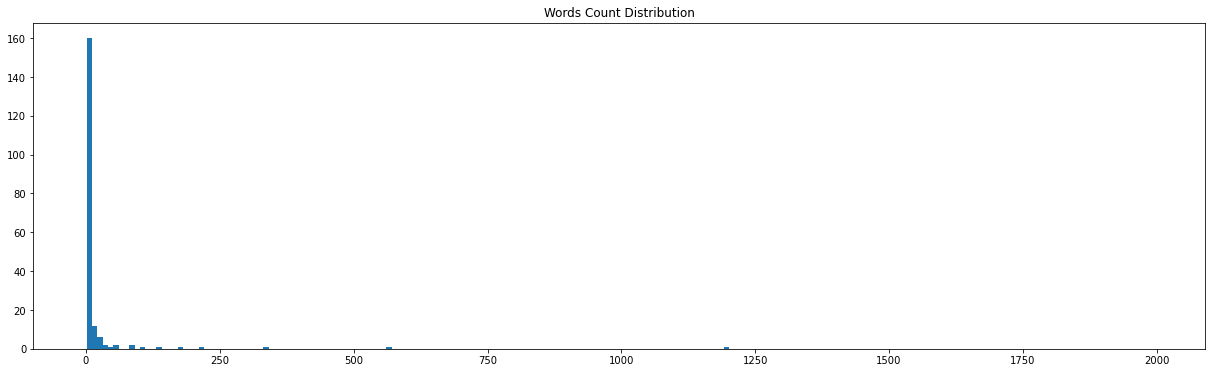

In [11]:
bins = np.arange(start = 1, stop = 2000, step = 10)
a = np.array(list(value_counts.values()))
plt.figure(figsize=(21, 6))
plt.hist(a, bins =bins, cumulative=False)
plt.title("Words Count Distribution") 
plt.show()

***Yalnızca bir kez geçen kelimelerin çıkarılması*** : Tüm veri setinde yalnızca 1 kez bulunan kelimeler mesajın tipi hakkında yeterli bir bilgi vermez. Bu yüzden bu kelimeler görmezden gelinip veri hafifletilmiştir.

In [12]:
lst = list(occurences.items())
print("count of unique words before removing least occured words from dataset: ", len(lst))
def remove_by_treshold(lst, trsh):
    new_lst = []
    for itm in lst:
        if itm[1] > trsh:
            new_lst.append(itm)

    return new_lst


strong_words_and_counts = dict(remove_by_treshold(lst, 1))
strong_words = list(map(lambda tple: tple[0], list(strong_words_and_counts.items())))
print("count of unique words after removing least occured words from dataset:  ", len(strong_words_and_counts))

# remove_by_treshold(lst, 25)


count of unique words before removing least occured words from dataset:  8156
count of unique words after removing least occured words from dataset:   3779


## Güçlü kelimelerin dağılımı

Text(0.5, 0.98, 'Strong Words distribution')

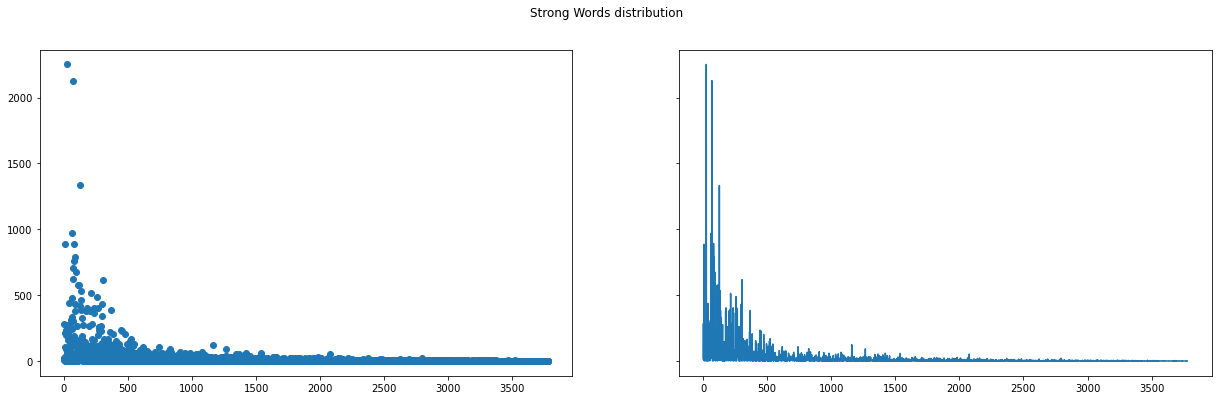

In [14]:
names = list(range(0, len(strong_words_and_counts.keys())))
values = list(strong_words_and_counts.values())

fig, axs = plt.subplots(1, 2, figsize=(21,6), sharey=True)
axs[0].scatter(names, values)
axs[1].plot(names, values)
fig.suptitle('Strong Words distribution')

In [15]:
def check_if_word_is_strong(strong_words: list, word):
    if word in strong_words:
        return True
    else:
        return False

In [16]:
def reshape_message(message: str):
    word_list = message.split(' ')
    new_list = []
    for wrd in word_list:
            wrd = remove_special_chars(wrd)
            if check_if_word_is_strong(strong_words, wrd):
                new_list.append(wrd)
    return ' '.join(new_list)

In [17]:
msg = "deneme yes deneme yes deneme yes no hi hey hii babe"
print(reshape_message(msg))

yes yes yes no hi hey babe


In [18]:
def reshape_label(lbl: str):
    if lbl == 'ham' or lbl == 0:
        return 0
    elif lbl == 'spam' or lbl == 1:
        return 1
    else:
        return

# VERİ SETİNİN BELİRLENEN ÖZELLİKLERE GÖRE FİLTRELENMESİ

In [20]:
df['label'] = df['label'].apply(reshape_label)
df['message'] = df['message'].apply(reshape_message)
df

,message,label
0,go until point crazy available only in bugis g...,0
1,ok lar joking wif oni,0
2,free entry in wkly comp to win fa cup final tk...,1
3,dun say so early hor already then say,0
4,nah dont think he goes to usf he lives around ...,0
...,...,...
5569,this is the time we have tried contact have wo...,1
5570,will going to esplanade fr home,0
5571,was in mood for that other,0
5572,the guy did some but acted like id be interest...,0


# TEXT VERİSİNİN VEKTÖREL HALE DÖNÜŞTÜRÜLMESİ

In [22]:
def calculate_acc(conf_mat):
    sum = 0
    total = 0
    for i in range(len(conf_mat)):
        for j in range(len(conf_mat[i])):
            if i == j:
                sum += conf_mat[i][j]
            total += conf_mat[i][j]
    return sum, total, (sum / total)

In [23]:
def print_acc(conf_mat):
    print(conf_mat)
    trues, total, acc = calculate_acc(conf_mat)
    print()
    print(trues, '/', total , '=', acc)

# VERİ SETİNİN BÖLÜNMESİ

In [24]:
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network, gaussian_process, naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.neighbors import KNeighborsClassifier

vectorizer = CountVectorizer()
tfidfconverter = TfidfTransformer()

X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.3, random_state=0)

vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
tfidfconverter.fit(X_train)
X_train = tfidfconverter.transform(X_train).toarray()


X_test = vectorizer.transform(X_test)
X_test = tfidfconverter.transform(X_test).toarray()

In [55]:
# MAKİNE ÖĞRENİMİ ALGORİTMALARI

In [54]:
## 3NN Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
k3nn_predict = knn.predict(X_test)

print(classification_report(y_test, k3nn_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1431
           1       1.00      0.46      0.63       242

    accuracy                           0.92      1673
   macro avg       0.96      0.73      0.79      1673
weighted avg       0.93      0.92      0.91      1673



In [53]:
## 1NN Classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
k1nn_predict = knn.predict(X_test)

print(classification_report(y_test, k1nn_predict))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1431
           1       0.99      0.65      0.78       242

    accuracy                           0.95      1673
   macro avg       0.97      0.82      0.88      1673
weighted avg       0.95      0.95      0.94      1673



In [52]:
## Guassian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
fit_nb = nb_model.fit(X_train,y_train)
naive_predict = fit_nb.predict(X_test)

print(classification_report(y_test, naive_predict))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1431
           1       0.61      0.85      0.71       242

    accuracy                           0.90      1673
   macro avg       0.79      0.88      0.82      1673
weighted avg       0.92      0.90      0.91      1673



In [51]:
## MultinomialNB

In [32]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
fit_mnb = mnb_model.fit(X_train, y_train)
mnb_predict = fit_mnb.predict(X_test)

print(classification_report(y_test, mnb_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1431
           1       1.00      0.74      0.85       242

    accuracy                           0.96      1673
   macro avg       0.98      0.87      0.91      1673
weighted avg       0.96      0.96      0.96      1673



In [50]:
## SVC

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 0)
classifier.fit(X_train, y_train)

svc_pred = classifier.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1431
           1       0.98      0.85      0.91       242

    accuracy                           0.98      1673
   macro avg       0.98      0.92      0.95      1673
weighted avg       0.98      0.98      0.97      1673



In [49]:
## Linear Regression

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', random_state=0)
classifier.fit(X_train, y_train)

lnr_pred = classifier.predict(X_test)
print(classification_report(y_test, lnr_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1431
           1       0.99      0.71      0.83       242

    accuracy                           0.96      1673
   macro avg       0.97      0.85      0.90      1673
weighted avg       0.96      0.96      0.95      1673



In [48]:
# BAŞARI ORANLARININ KARŞILAŞTIRILMASI

In [40]:
MLA = [
    ensemble.RandomForestClassifier(),
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    
    linear_model.LogisticRegression(solver='liblinear'),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    naive_bayes.MultinomialNB(),

    neighbors.KNeighborsClassifier(n_neighbors=1),
    neighbors.KNeighborsClassifier(n_neighbors=3),

    svm.SVC(),
    svm.LinearSVC(),  
]

In [41]:
algorithm_columns = []
compare_algorithms_df = pd.DataFrame(columns = algorithm_columns)
row_index = 0

for algorithm in MLA:
    
    predicted = algorithm.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    name = algorithm.__class__.__name__
    compare_algorithms_df.loc[row_index,'Name'] = name
    compare_algorithms_df.loc[row_index, 'Train Accuracy'] = round(algorithm.score(X_train, y_train), 4)
    compare_algorithms_df.loc[row_index, 'Test Accuracy'] = round(algorithm.score(X_test, y_test), 4)
    compare_algorithms_df.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    compare_algorithms_df.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    compare_algorithms_df.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
compare_algorithms_df.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare_algorithms_df



,Name,Train Accuracy,Test Accuracy,Precision,Recall,AUC
6,SGDClassifier,0.9977,0.9785,0.981308,0.867769,0.932487
14,LinearSVC,0.9979,0.9773,0.976636,0.863636,0.930071
4,PassiveAggressiveClassifier,0.9995,0.9761,0.950893,0.880165,0.936239
7,Perceptron,0.9995,0.9749,0.920168,0.904959,0.945841
5,RidgeClassifierCV,0.9933,0.9743,0.980676,0.838843,0.918024
8,BernoulliNB,0.9836,0.9725,0.953704,0.851240,0.922126
13,SVC,0.9964,0.9725,0.985149,0.822314,0.910109
0,RandomForestClassifier,0.9995,0.9677,0.989583,0.785124,0.891863
2,BaggingClassifier,0.9946,0.9641,0.955000,0.789256,0.891483
10,MultinomialNB,0.9705,0.9623,1.000000,0.739669,0.869835


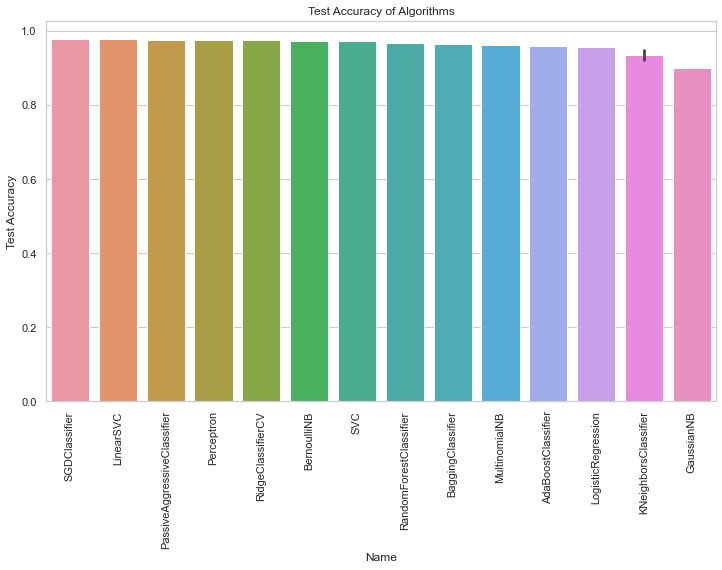

In [42]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(x="Name", y="Test Accuracy", data=compare_algorithms_df)
title = plt.title('Test Accuracy of Algorithms')

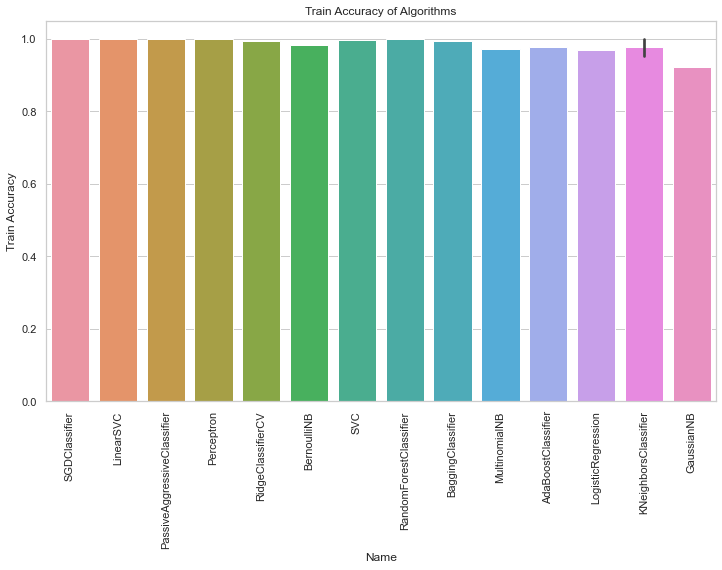

In [43]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(x="Name", y="Train Accuracy", data=compare_algorithms_df)
title = plt.title('Train Accuracy of Algorithms')

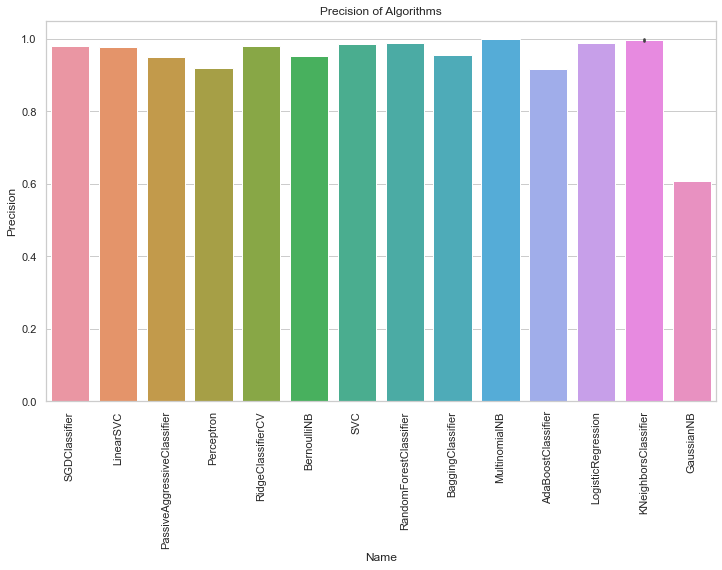

In [44]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(x="Name", y="Precision", data=compare_algorithms_df)
title = plt.title('Precision of Algorithms')

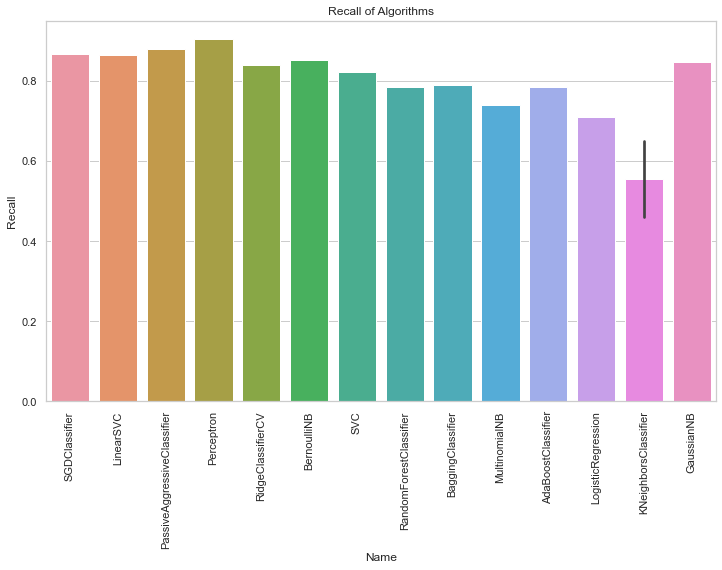

In [45]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(x="Name", y="Recall", data=compare_algorithms_df)
title = plt.title('Recall of Algorithms')

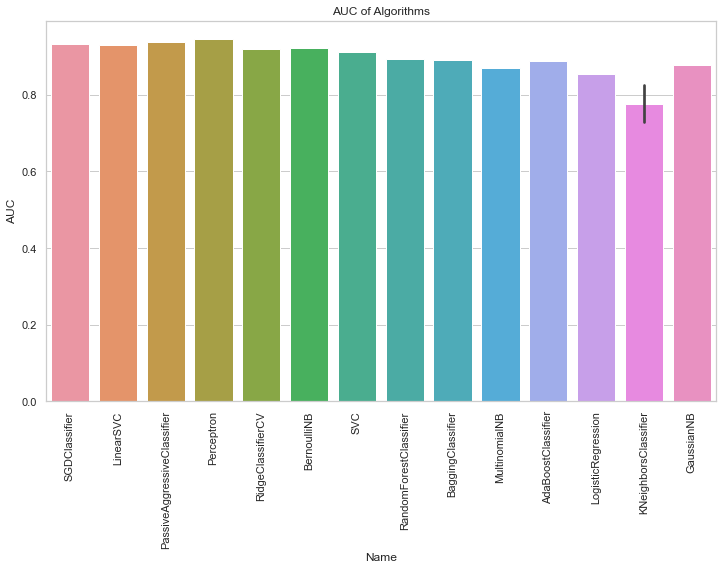

In [46]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation=90)
sns.barplot(x="Name", y="AUC", data=compare_algorithms_df)
title = plt.title('AUC of Algorithms')

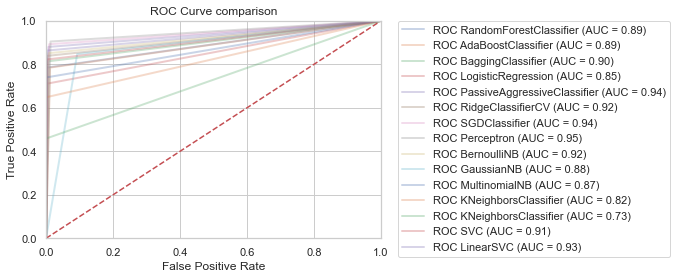

In [47]:


index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()


